In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.89081455211141


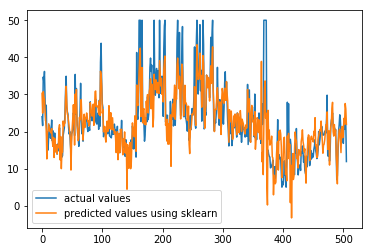

In [5]:
import matplotlib.pyplot as plt

Y_predict = clf.predict(X)
plt.plot(Y, label='actual values')
plt.plot(Y_predict, label='predicted values using sklearn')
plt.legend()
plt.show()

In [28]:
weights = clf.coef_
print(weights)

[-0.64127028  0.4356854  -0.40992165  0.74929089 -1.02917759  3.15490239
  0.03811238 -1.96872647  1.02701293 -0.51565611 -1.86614793  0.86406516
 -3.35147307]


In [19]:
print(X.shape)
#print(X[100,1])

(506, 13)


[0.09063289365349048, 0.46477247411761513, 0.07372071565302052, 0.9186379600739579, 0.13032290336073615, 0.43719370278044256, 0.4725965542426208, 0.20463401585268004, 0.5223719717804116, 0.9741836816294577, 0.5681192596356058, 0.8909759154496986, 0.5375189258124214]
[-1.3972047085116142, -2.953906576646615, 0.8629750727995736, 13.822246502659617, -4.329279492769166, 5.9003221002890935, -5.856090074095588, -0.3008665647489618, 3.138086252385895, 0.27939146969655837, 6.767274659570607, -2.8983423329184523, -4.995526996410334]


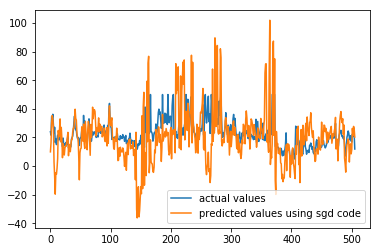

In [110]:
#applying Stochastic gradient descent on oston data set by choosing random K points at each step

#find the number of points and features in dataset
features= X.shape[1]
n_points = X.shape[0]

#generate a random hyperplane
w = [np.random.random() for _ in range(features)]
b= np.random.random()
print(w)  #initial coeffiecients
#print(b)

dlw=[]
wTx=[]
for k in range(features):
         dlw.append(0)
for k in range(n_points):
         wTx.append(0)
        
for l in range(10000):    #number of iteration
    
        
    rd = 20 #number of random points chosen for SGD
    
    for k in range(features):
         dlw[k]=0
    for k in range(n_points):
         wTx[k]=0
    dlb = 0
    
    for i in range(rd):
        j = np.random.randint(0,n_points)  #randomly selecting a point
        wTx[j] = 0
        for k in range(features):
            wTx[j] += w[k]*X[j,k]
            
        for k in range(features):
                dlw[k] = dlw[k] - (2.0/float(rd)*X[j,k]*(Y[j]-wTx[j]-b))
                
        dlb = dlb - (2.0/float(rd)*(Y[j]-wTx[j]-b))
        
    if l==0:
        r=1.0   #learning rate
    else:
        r=r/2.0
    
    for k in range(features):
        w[k] = w[k] - r*dlw[k]
    b = b - r*dlb
    
Y_predictcd=[] 
for j in range(n_points):
    wTx[j] = 0
    for k in range(features):
            wTx[j] += w[k]*X[j,k]
    yi = wTx[j]+b
    Y_predictcd.append(yi)
#print(Y_predictcd)
print(w) #final coefficients
#print(b)
plt.plot(Y, label='actual values')
plt.plot(Y_predictcd, label='predicted values using sgd code') #predicted values
plt.legend()
plt.show()

In [111]:
#Calculating MSE
meansquare_error_sgd = 0.0
for k in range(n_points):
     meansquare_error_sgd += (Y[k]-Y_predictcd[k])**2/float(n_points)
        
print(meansquare_error_sgd)

292.1610443885336


In [112]:
#Comapring the MSE of two implementaions
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Method", "MSE"]

x.add_row(["sklearn implementation", "22.89"])
x.add_row(["Custom SGDRegressor", "292.16"])


print(x)

+------------------------+--------+
|         Method         |  MSE   |
+------------------------+--------+
| sklearn implementation | 22.89  |
|  Custom SGDRegressor   | 292.16 |
+------------------------+--------+


In [115]:
##Comapring the weights of two implementaions
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Weights","sklearn implementation", "Custom SGDRegressor"]

x.add_row(["1",weights[0], w[0]])
x.add_row(["2",weights[1], w[1]])
x.add_row(["3",weights[2], w[2]])
x.add_row(["4",weights[3], w[3]])
x.add_row(["5",weights[4], w[4]])
x.add_row(["6",weights[5], w[5]])
x.add_row(["7",weights[6], w[6]])
x.add_row(["8",weights[7], w[7]])
x.add_row(["9",weights[8], w[8]])
x.add_row(["10",weights[9], w[9]])
x.add_row(["11",weights[10], w[10]])
x.add_row(["12",weights[11], w[11]])
x.add_row(["13",weights[12], w[12]])

print(x)

+---------+------------------------+---------------------+
| Weights | sklearn implementation | Custom SGDRegressor |
+---------+------------------------+---------------------+
|    1    |  -0.6412702765070117   | -1.3972047085116142 |
|    2    |   0.4356853964691579   |  -2.953906576646615 |
|    3    |  -0.40992165048353274  |  0.8629750727995736 |
|    4    |   0.7492908860594552   |  13.822246502659617 |
|    5    |  -1.0291775935585545   |  -4.329279492769166 |
|    6    |   3.154902391478983    |  5.9003221002890935 |
|    7    |  0.03811237886956214   |  -5.856090074095588 |
|    8    |  -1.9687264695417899   | -0.3008665647489618 |
|    9    |   1.027012933155099    |  3.138086252385895  |
|    10   |  -0.5156561070100063   | 0.27939146969655837 |
|    11   |  -1.8661479250746065   |  6.767274659570607  |
|    12   |   0.8640651623555202   | -2.8983423329184523 |
|    13   |  -3.3514730736702414   |  -4.995526996410334 |
+---------+------------------------+--------------------